## ケプストラム特徴量(メル周波数ケプストラム係数(MFCC))

メルフィルタバンクの工程で取得した特徴量(パワースペクトル)は、声門波と声道のインパルス応答の畳み込み和である。音声認識に必要なのは後者なので、これをパワースペクトルから取り出す。

1. パワースペクトルの対数を逆離散コサイン変換する。この結果はケフレンシーと呼ばれる。
2. ケフレンシーのうち声門波の成分は高ケフレンシーの領域に、インパルス応答の成分は低ケフレンシーの領域に現れる。なので低ケフレンシー領域を取り出す。(低い方から10~15次元)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import librosa
import speelysis as sly
import scipy.fftpack

In [2]:
audio = sly.Audio(*wav.read("../resources/aiueo.wav")).high_path_filtered()
_, n = sly.frame_candidates(audio.rate, 20, 80)
step_length = audio.rate * 10 // 1000
stfted = np.abs(librosa.stft(audio.data, n, step_length)) ** 2
n_bins = 20
bin_xs = sly.mel_filter_bank_freq(audio.rate // 2, n_bins)
bank = librosa.filters.mel(audio.rate, n, n_mels=20)

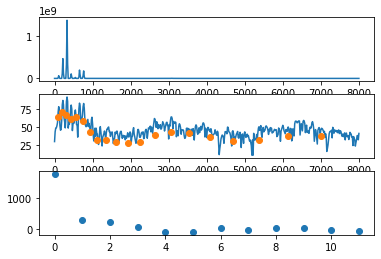

In [3]:
def plot_sample():
    _, plots = plt.subplots(3, 1)
    plot0, plot1, plot2 = plots
    
    # フーリエ変換の結果
    sample_data = stfted[:, stfted.shape[1]//2]
    freq = np.fft.rfftfreq(n, d=1/audio.rate)
    plot0.plot(freq, sample_data)

    # メルフィルタバンクの結果(メルスペクトログラム)
    bined = bank.dot(sample_data)
    plot1.plot(freq, librosa.power_to_db(sample_data))
    plot1.plot(bin_xs, librosa.power_to_db(bined), "o")
    
    # ケプストラム特徴量
    ceps = scipy.fftpack.dct(librosa.power_to_db(bined), axis=0)
    mfcc = ceps[:12]
    plot2.plot(mfcc, "o")
    
plot_sample()

(20, 329)


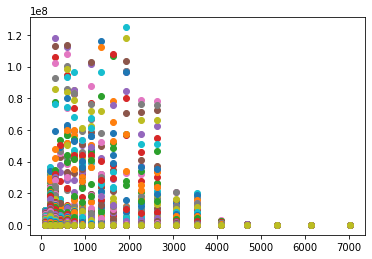

In [4]:
# まとめて処理
# メルスペクトログラム
melspectrogram = np.dot(bank, stfted)
print(melspectrogram.shape)
plt.plot(bin_xs, melspectrogram, "o")
pass

(12, 329)


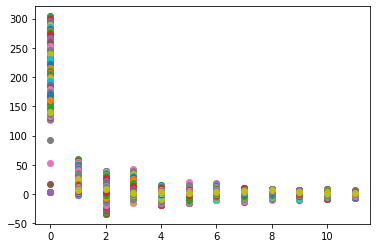

In [5]:
# ケプストラム特徴量(メル周波数ケプストラム係数(MFCC))

mfcc = scipy.fftpack.dct(librosa.power_to_db(melspectrogram), 
                         axis=0, 
                         norm="ortho")[:12]
print(mfcc.shape)
plt.plot(mfcc, "o")
pass

(12, 329)


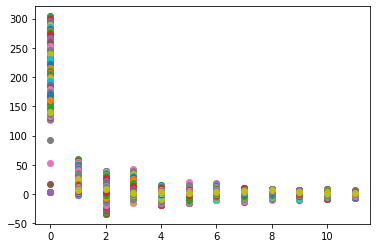

In [6]:
# librosaのと比較

lr_mfcc = librosa.feature.mfcc(audio.data, 
                               audio.rate, 
                               n_mfcc=12, 
                               n_fft=n, 
                               hop_length=step_length, 
                               n_mels=n_bins)
print(lr_mfcc.shape)
plt.plot(lr_mfcc, "o")
pass